In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#importing necessary libraries

# Data Setup

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()
#importing and calling the df to see what columns we will use, drop, rename

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df = df.rename(columns={'Unnamed: 0':'todrop'})
df = df.drop('todrop', axis=1)
# renaming and dropping columns we will not need for analysis

In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.info()
#checking datatypes to see if we need to change any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [ ]:
categorical_type = [0, 1, 3, 4, 22] + list(range(6, 20))
df.iloc[:,categorical_type] = df.iloc[:,categorical_type].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

In [ ]:
df.isnull().sum()
#checking for null entries in df

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [ ]:
df.duplicated().sum()
#checking for duplicate values

0

In [ ]:
df.shape
#seeing the total shape of df, the rows and columns

(103904, 23)

In [ ]:
df = df.fillna(method='ffill')
df.isnull().sum()
# forward filling null entries

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# Data Analysis

In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.describe()
#getting descriptive statistics on the datasets numeric categories

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.170119
std,15.114964,997.147281,38.230901,38.672917
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [ ]:
df.describe(include = ['category'])
#getting descriptive statistics on the datasets cateogrical categories

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4,neutral or dissatisfied
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179,58879


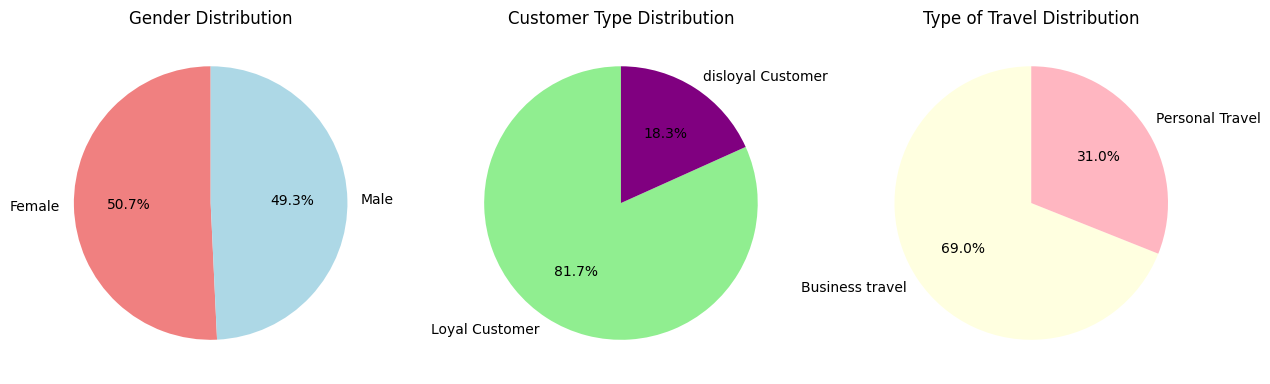

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

gender_counts = df['Gender'].value_counts()
customer_counts = df['Customer Type'].value_counts()
travel_type_counts = df['Type of Travel'].value_counts()

axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
axes[0].set_title('Gender Distribution')

axes[1].pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'purple'])
axes[1].set_title('Customer Type Distribution')

axes[2].pie(travel_type_counts, labels=travel_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightyellow', 'lightpink'])
axes[2].set_title('Type of Travel Distribution')

plt.show()
#plotting a pie charts to establish demographic segments

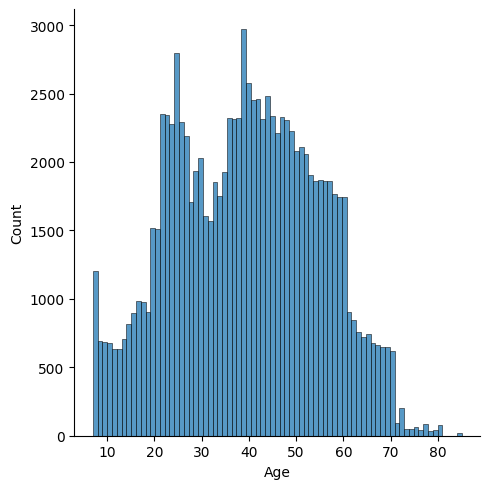

In [ ]:
sns.displot( data=df["Age"])
#plotting age histogram

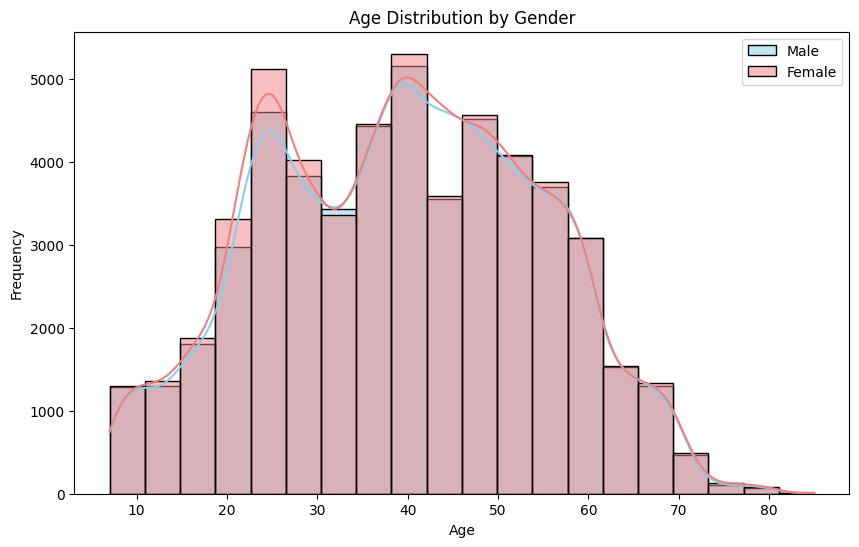

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Gender'] == 'Male'], x='Age', bins=20, kde=True, color='skyblue', label='Male')
sns.histplot(data=df[df['Gender'] == 'Female'], x='Age', bins=20, kde=True, color='lightcoral', label='Female')

plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()
#plotting male and female age histograms

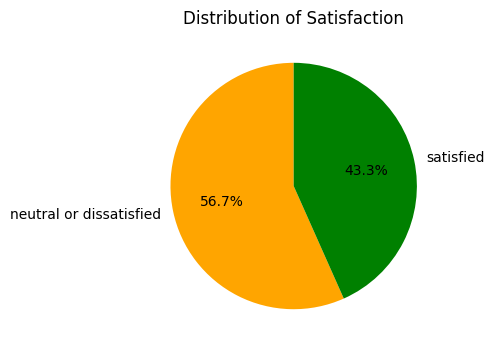

In [ ]:
satisfaction_counts = df['satisfaction'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'green'])
plt.title('Distribution of Satisfaction')
plt.show()
#visualising distribution of staisfaction from the dataset

satisfaction is rather balanced, we wish to see what factors drive satisfaction

In [ ]:
corr_mat = df.corr()
corr_mat

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,-0.010152,-0.012045
Flight Distance,0.099461,1.000000,0.002158,-0.002458
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.960217
Arrival Delay in Minutes,-0.012045,-0.002458,0.960217,1.000000


<Axes: >

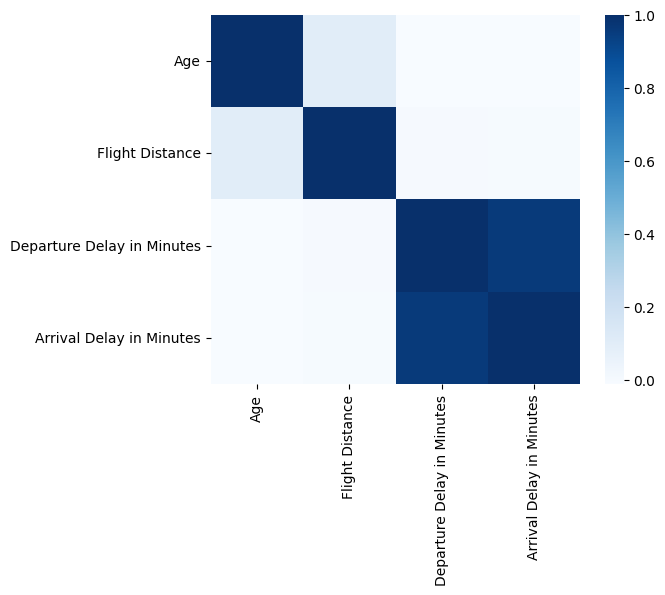

In [ ]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
#plotting the correlation matrix to visually understand any correlation betweeen quantitative features

there is a strong correlation between delays in departure and delays in arrival. naturally, if the flights departure was delayed, subsequently the flights arrival was also delayed by the same time unless the aircraft did not accelerate in flight to make up for delays

<Axes: xlabel='Age', ylabel='Count'>

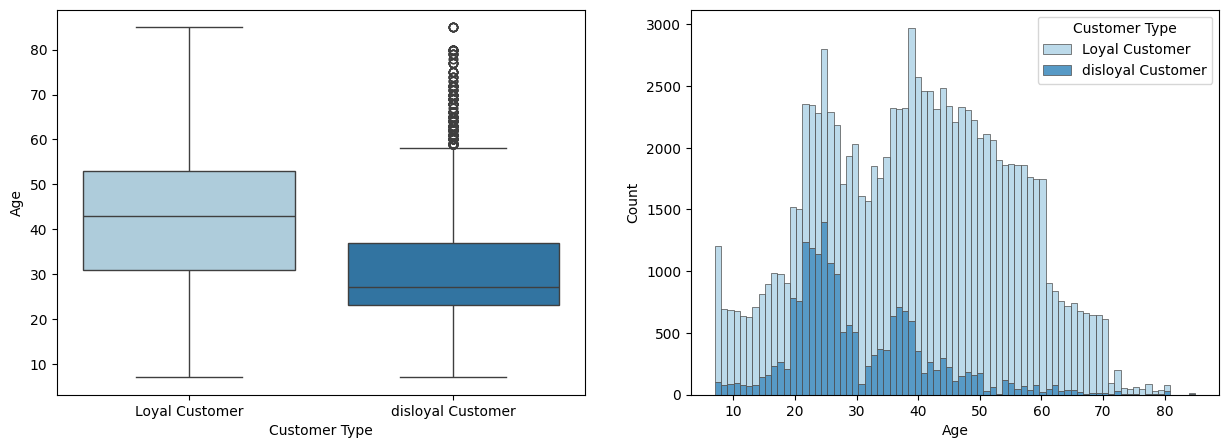

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot( x=df["Customer Type"], y=df["Age"], palette = 'Paired', data = df, ax = ax[0])
sns.histplot(df, x='Age', hue = 'Customer Type', multiple = 'stack', palette = 'Paired', edgecolor = ".3", linewidth = .5, ax = ax[1])
# plotting box plots and stacked histograms based on customer type

the box plot and histogram above shows the distribution of age across customer types, the majority of loyal customers are aged between 30 and 50 years old whilst a large portion of disloyal customers are aged between 20 and 40 years old. the

<Axes: xlabel='Age', ylabel='Count'>

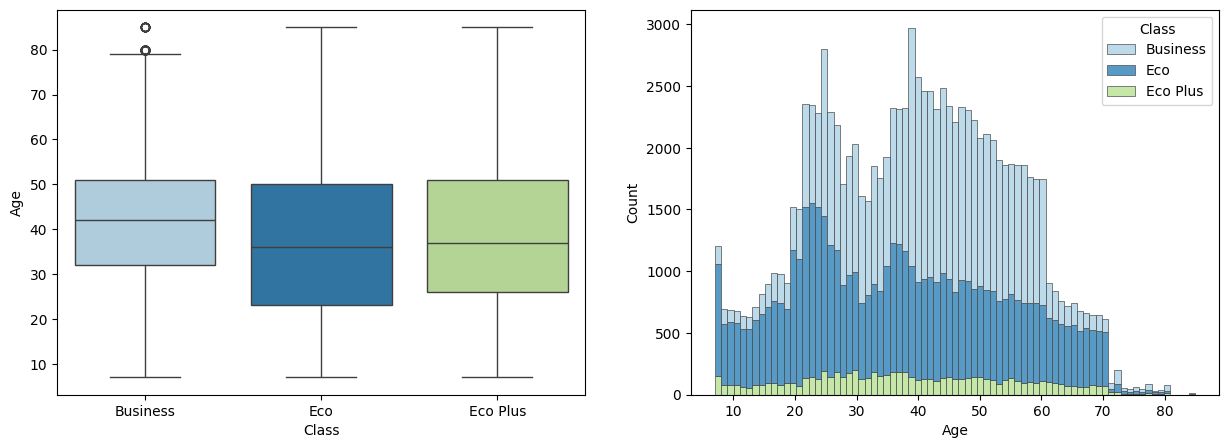

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot( x=df["Class"], y=df["Age"], palette = 'Paired', data = df, ax = ax[0])
sns.histplot(df, x='Age', hue = 'Class', multiple = 'stack', palette = 'Paired', edgecolor = ".3", linewidth = .5, ax = ax[1])
# plotting box plots and stacked histograms based on class type

the age distribution across the varying classes is more or less the same, however the majority of passengers traveling in business class are more densely packed between 30 and 50 years old ,this could be due to the greater spending power these individuals have

<Axes: xlabel='Flight Distance', ylabel='Count'>

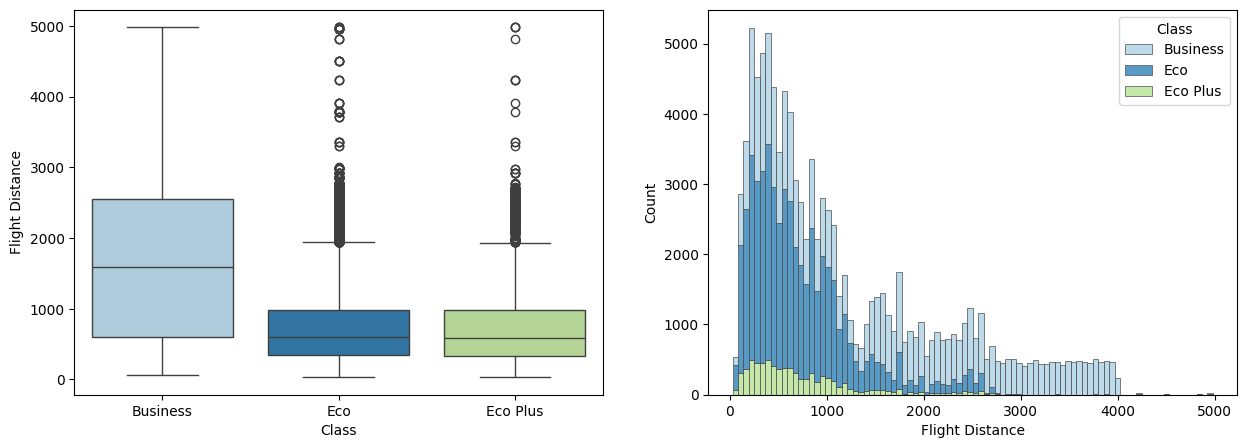

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot( x=df["Class"], y=df["Flight Distance"], palette = 'Paired', data = df, ax = ax[0])
sns.histplot(df, x='Flight Distance', hue = 'Class', multiple = 'stack', palette = 'Paired', edgecolor = ".3", linewidth = .5, ax = ax[1])
# plotting box plots and stacked histograms based on flight distance and passenger class

the pattern visible in the box plot and histogram above lead us to conclude that the greater the flight distance the more likely they are to travel in business class, prioritzing comfort for longer flights

<Axes: xlabel='Flight Distance', ylabel='Count'>

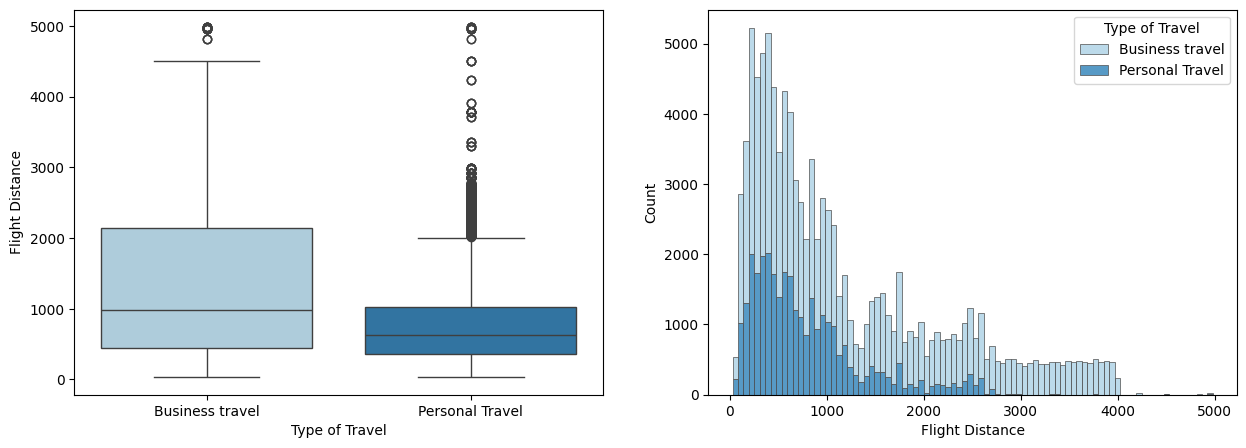

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot( x=df["Type of Travel"], y=df["Flight Distance"], palette = 'Paired', data = df, ax = ax[0])
sns.histplot(df, x='Flight Distance', hue = 'Type of Travel', multiple = 'stack', palette = 'Paired', edgecolor = ".3", linewidth = .5, ax = ax[1])

<Axes: xlabel='Flight Distance', ylabel='Count'>

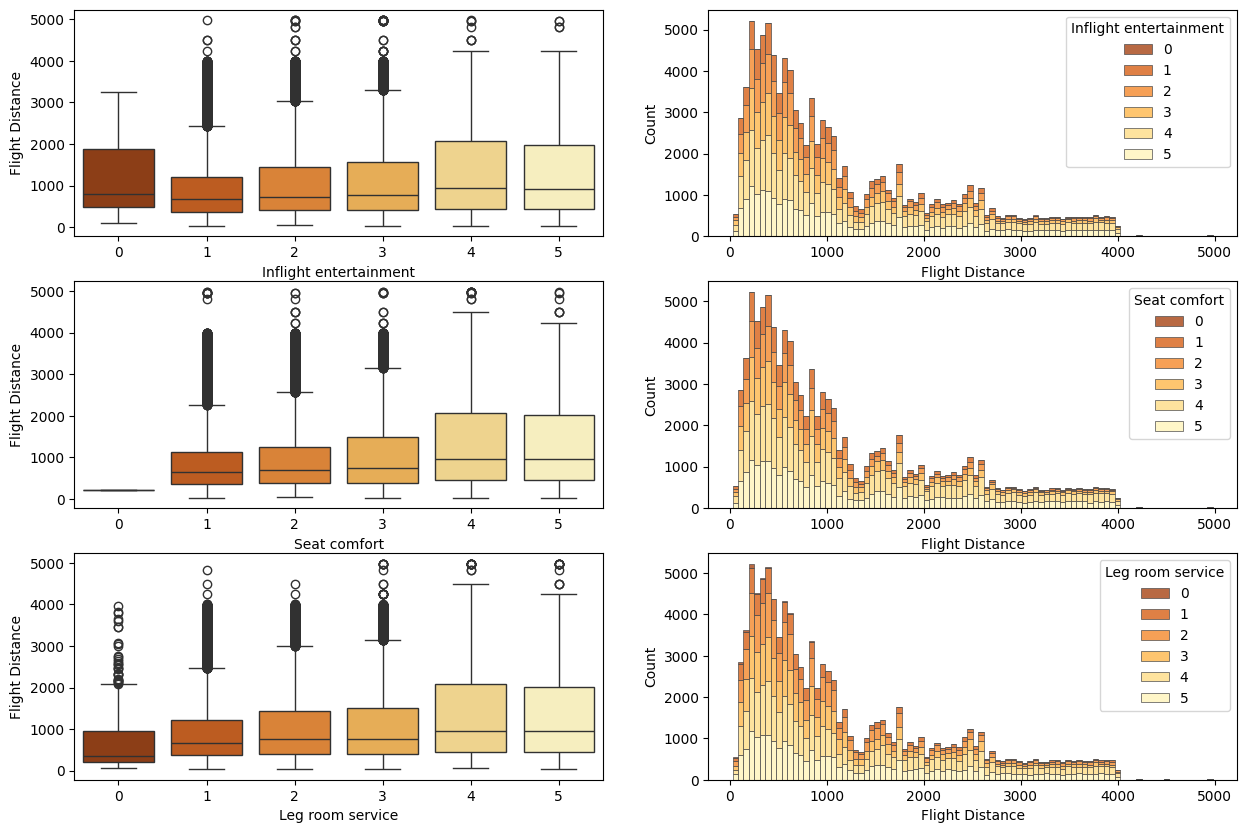

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))

sns.boxplot( x=df["Inflight entertainment"], y=df["Flight Distance"], palette = 'YlOrBr_r', data = df, ax = ax[0, 0])
sns.histplot(df, x='Flight Distance', hue = 'Inflight entertainment', multiple = 'stack', palette = 'YlOrBr_r', edgecolor = ".3", linewidth = .5, ax = ax[0, 1])

sns.boxplot( x=df["Seat comfort"], y=df["Flight Distance"], palette = 'YlOrBr_r', data = df, ax = ax[1, 0])
sns.histplot(df, x='Flight Distance', hue = 'Seat comfort', multiple = 'stack', palette = 'YlOrBr_r', edgecolor = ".3", linewidth = .5, ax = ax[1, 1])

sns.boxplot( x=df["Leg room service"], y=df["Flight Distance"], palette = 'YlOrBr_r', data = df, ax = ax[2, 0])
sns.histplot(df, x='Flight Distance', hue = 'Leg room service', multiple = 'stack', palette = 'YlOrBr_r', edgecolor = ".3", linewidth = .5, ax = ax[2, 1])

# plotting box plots and stacked histograms for variable satisfactory based features

from the above box plots the following pattern can be observed: the greater the flight distance the more satisfied the passengers are with inflight entertainment, seat comfort, and leg room service.  

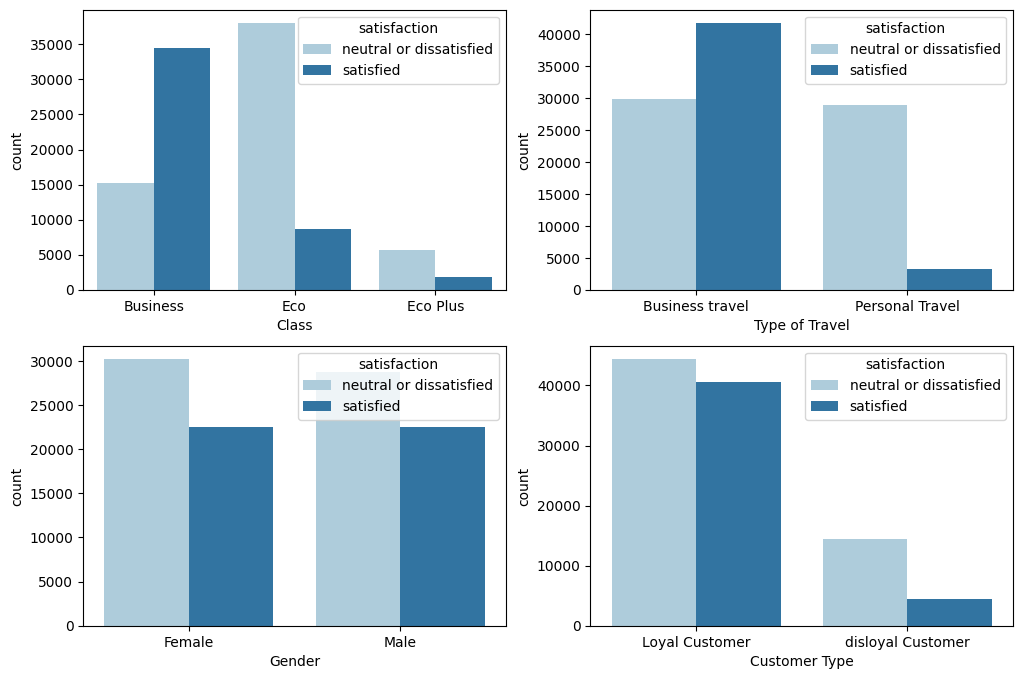

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x='Class', hue = 'satisfaction', palette = 'Paired', data = df, ax = ax[0, 0])
sns.countplot(x='Type of Travel', hue = 'satisfaction', palette = 'Paired', data = df, ax = ax[0, 1])
sns.countplot(x='Gender', hue = 'satisfaction', palette = 'Paired', data = df, ax = ax[1, 0])
sns.countplot(x='Customer Type', hue = 'satisfaction', palette = 'Paired', data = df, ax = ax[1,1])

plt.show()
#plotting bar charts to visualise satisfaction levels across various categories

from the four bar charts above we are able to determine the satisfaction level for various categorical fields. economy and economy plus passengers are dissatisfied with the flying experience, whilst the majority of business class passengers are satisfied. when comparing the satisfaction levels by gender we notice that the majority of passengers, from both genders, are dissatsfied. comparing passengers's reasons travel purpose, the majority of passengers travelling for business are satisfied whilst almost all passengers traveling for personal reasons are dissatisfied with the experience. when comparing the satisfaction levels across customer type the loyal customers show little difference in satisfaction whilse there are more dissatisfied disloyal customers (repeat customers) than satisfied disloyal customers (repeat customers)

In [ ]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

segmenting the df into different aspects of the experience : pre flight, flight, and post flight. this is done to visualise the satisfaction score per aspect of the journey

## Pre Flight Factors

the following section is an analysis of the pre flight factors of a passnegers experience when flying, each categorical variable will be displayed against the variables they encounter pre flight experience

In [ ]:
pre_flight_factors = df[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class','Checkin service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Online boarding', 'Departure Delay in Minutes', 'satisfaction']]

In [72]:
columns_to_average_pre_flight = ['Checkin service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Online boarding']

for column in columns_to_average_pre_flight:
    pre_flight_factors[column] = pre_flight_factors[column].astype(int)

average_ratings_pre_flight = pre_flight_factors[columns_to_average_pre_flight].mean()
print("Average Ratings for Pre-flight Factors:")
print(average_ratings_pre_flight)
#calculating average score for pre flight factors

Average Ratings for Pre-flight Factors:
Checkin service                       3.304290
Departure/Arrival time convenient     3.060296
Ease of Online booking                2.756901
Gate location                         2.976883
Online boarding                       3.250375
Departure Delay in Minutes           14.815618
dtype: float64


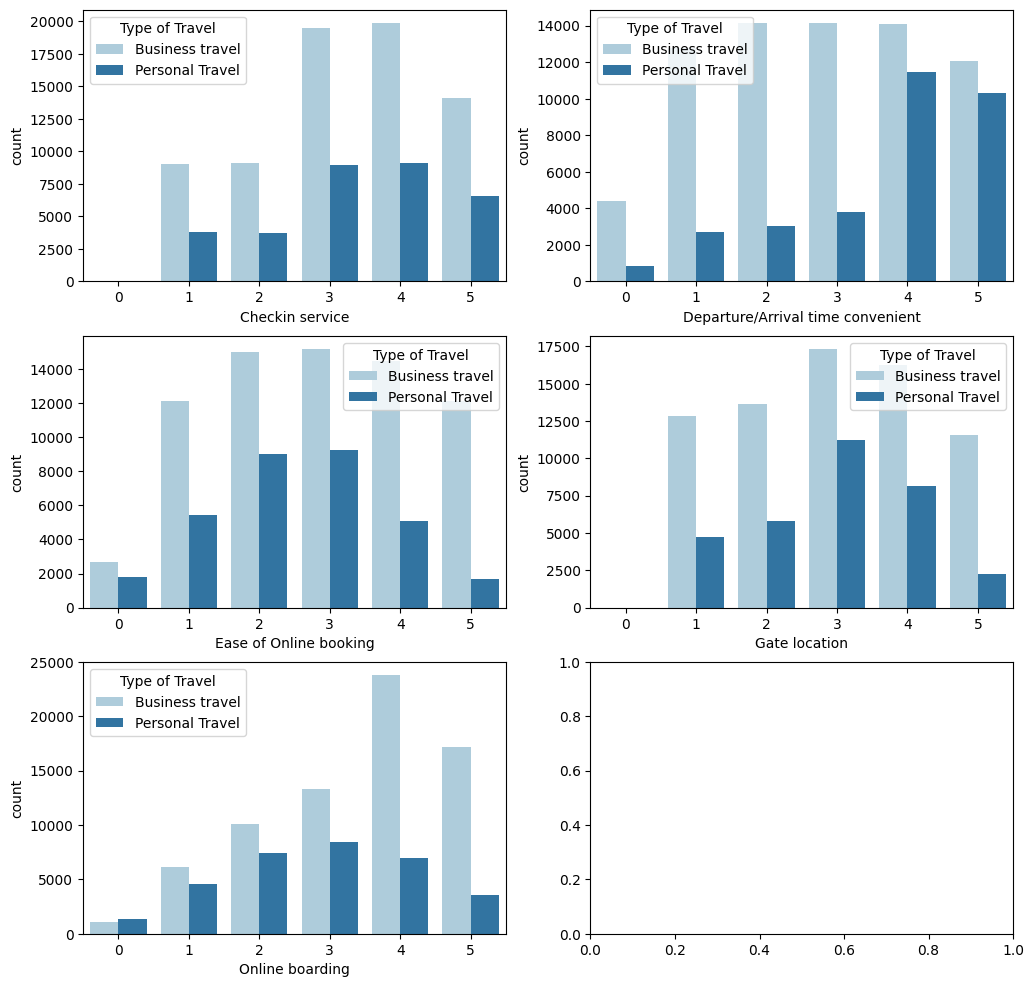

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

sns.countplot(x='Checkin service', hue='Type of Travel', palette='Paired', data=pre_flight_factors, ax=ax[0, 0])
sns.countplot(x='Departure/Arrival time convenient', hue='Type of Travel', palette='Paired', data=pre_flight_factors, ax=ax[0, 1])
sns.countplot(x='Ease of Online booking', hue='Type of Travel', palette='Paired', data=pre_flight_factors, ax=ax[1, 0])
sns.countplot(x='Gate location', hue='Type of Travel', palette='Paired', data=pre_flight_factors, ax=ax[1, 1])
sns.countplot(x='Online boarding', hue='Type of Travel', palette='Paired', data=pre_flight_factors, ax=ax[2, 0])

plt.show()


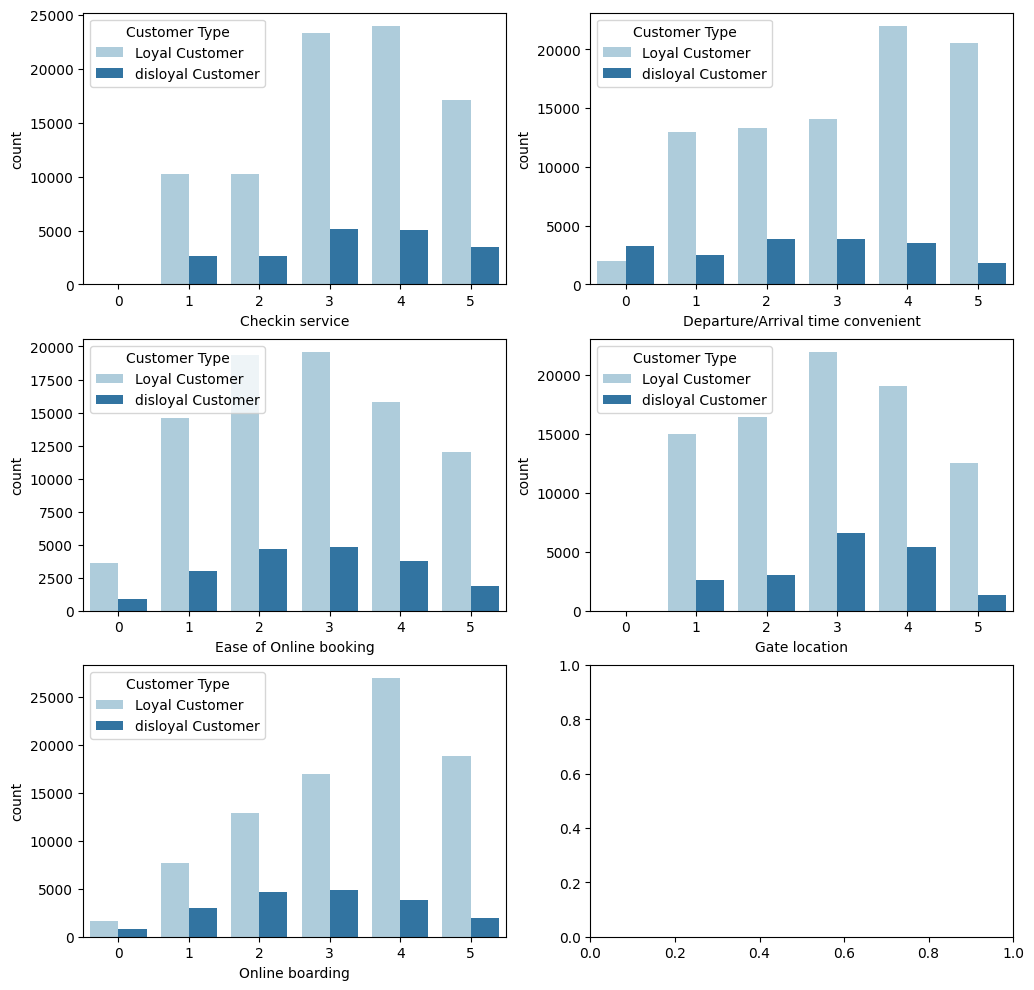

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

sns.countplot(x='Checkin service', hue='Customer Type', palette='Paired', data=pre_flight_factors, ax=ax[0, 0])
sns.countplot(x='Departure/Arrival time convenient', hue='Customer Type', palette='Paired', data=pre_flight_factors, ax=ax[0, 1])
sns.countplot(x='Ease of Online booking', hue='Customer Type', palette='Paired', data=pre_flight_factors, ax=ax[1, 0])
sns.countplot(x='Gate location', hue='Customer Type', palette='Paired', data=pre_flight_factors, ax=ax[1, 1])
sns.countplot(x='Online boarding', hue='Customer Type', palette='Paired', data=pre_flight_factors, ax=ax[2, 0])

plt.show()


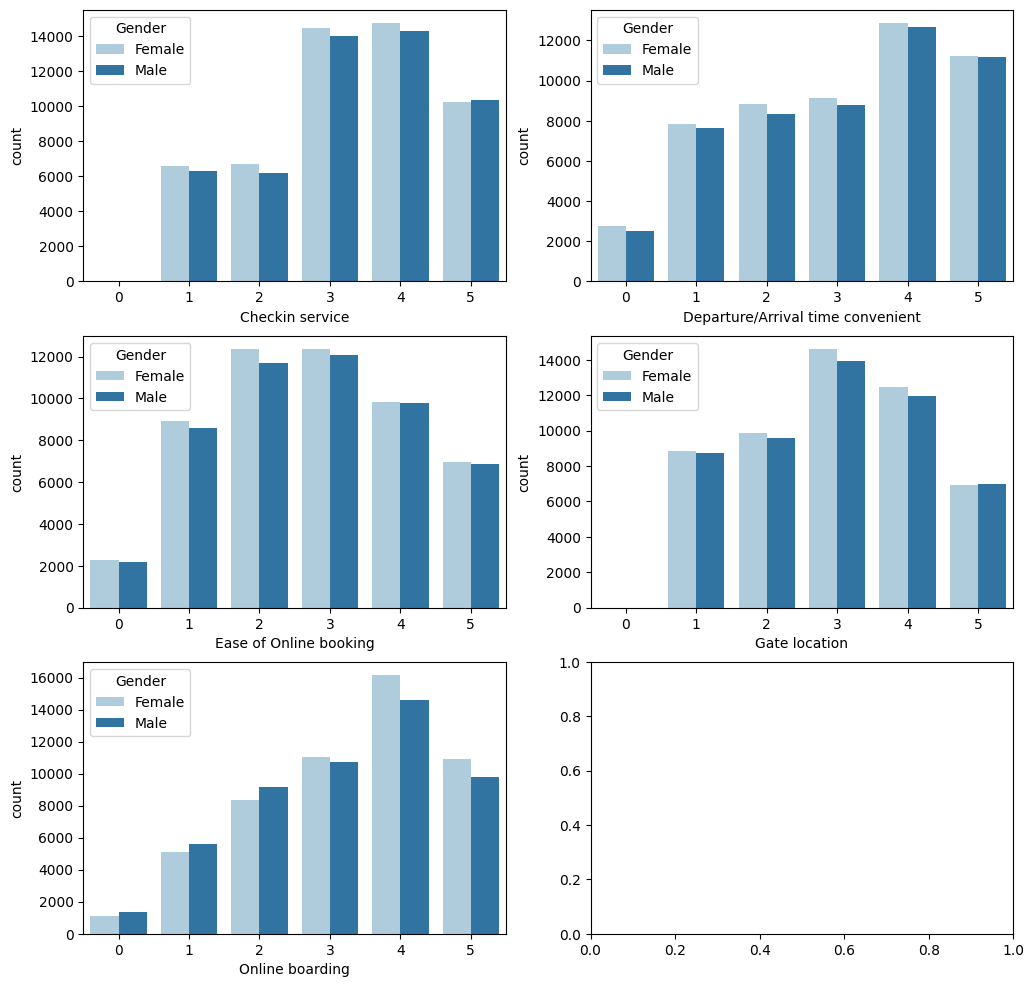

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

sns.countplot(x='Checkin service', hue='Gender', palette='Paired', data=pre_flight_factors, ax=ax[0, 0])
sns.countplot(x='Departure/Arrival time convenient', hue='Gender', palette='Paired', data=pre_flight_factors, ax=ax[0, 1])
sns.countplot(x='Ease of Online booking', hue='Gender', palette='Paired', data=pre_flight_factors, ax=ax[1, 0])
sns.countplot(x='Gate location', hue='Gender', palette='Paired', data=pre_flight_factors, ax=ax[1, 1])
sns.countplot(x='Online boarding', hue='Gender', palette='Paired', data=pre_flight_factors, ax=ax[2, 0])

plt.show()


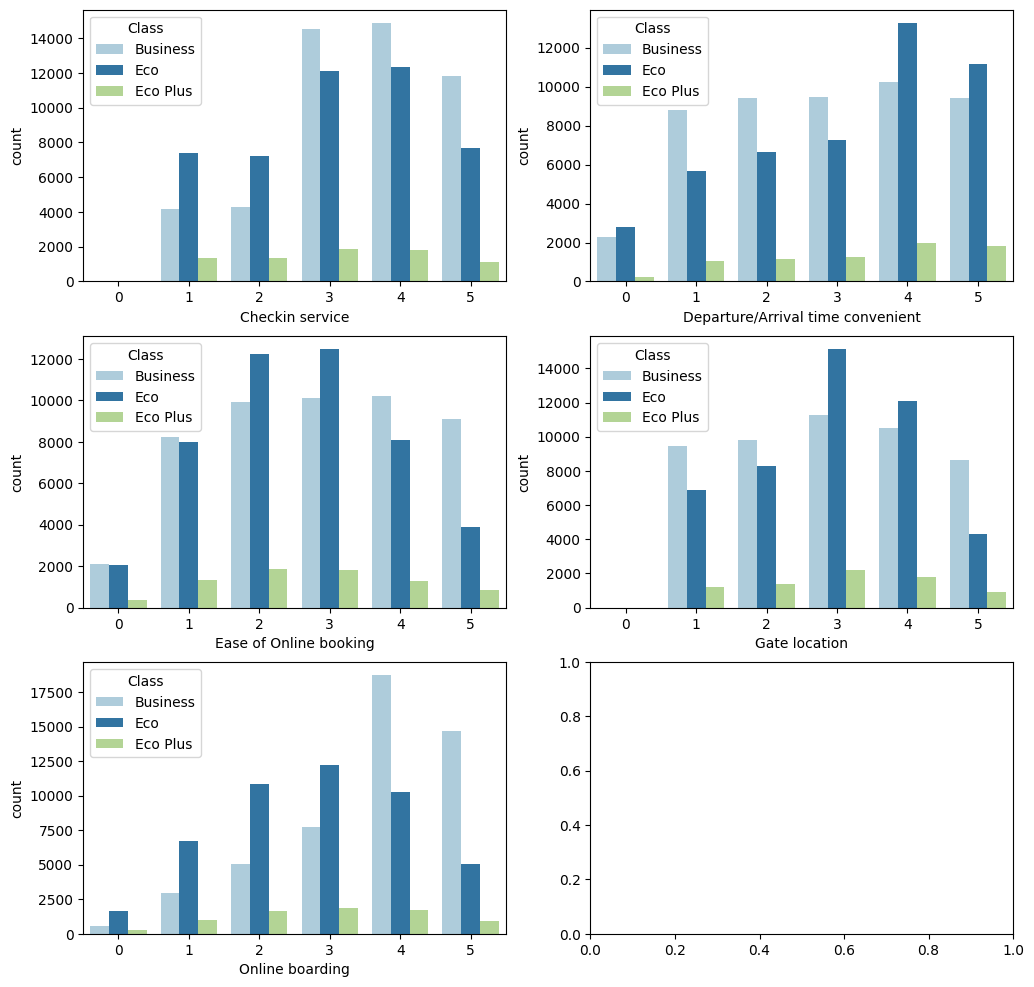

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

sns.countplot(x='Checkin service', hue='Class', palette='Paired', data=pre_flight_factors, ax=ax[0, 0])
sns.countplot(x='Departure/Arrival time convenient', hue='Class', palette='Paired', data=pre_flight_factors, ax=ax[0, 1])
sns.countplot(x='Ease of Online booking', hue='Class', palette='Paired', data=pre_flight_factors, ax=ax[1, 0])
sns.countplot(x='Gate location', hue='Class', palette='Paired', data=pre_flight_factors, ax=ax[1, 1])
sns.countplot(x='Online boarding', hue='Class', palette='Paired', data=pre_flight_factors, ax=ax[2, 0])

plt.show()


## Flight Factors

the following section is an analysis of the inflight factors of a passnegers experience when flying, each categorical variable will be displayed against the variables they encounter during flight experience

In [ ]:
flight_factors = df[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Food and drink', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Inflight service', 'Cleanliness', 'satisfaction' ]]

In [71]:
columns_to_average = ['Inflight wifi service', 'Food and drink', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Inflight service', 'Cleanliness']
for column in columns_to_average:
    flight_factors[column] = flight_factors[column].astype(int)

average_ratings = flight_factors[columns_to_average].mean()
print("Average Ratings:")
print(average_ratings)
#finding average ratings for infligth factors

Average Ratings:
Inflight wifi service     2.729683
Food and drink            3.202129
Seat comfort              3.439396
Inflight entertainment    3.358158
On-board service          3.382363
Leg room service          3.351055
Inflight service          3.640428
Cleanliness               3.286351
dtype: float64


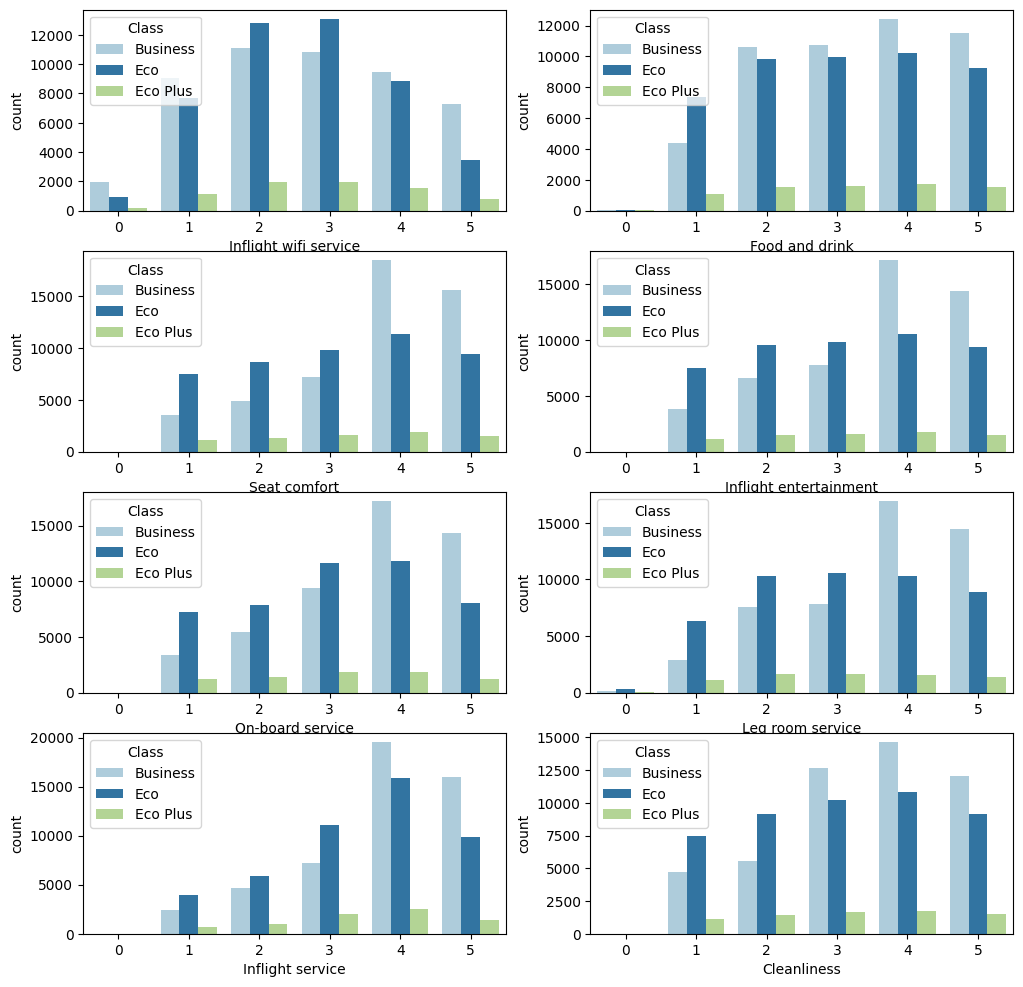

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(12, 12))

sns.countplot(x='Inflight wifi service', hue='Class', palette='Paired', data=flight_factors, ax=ax[0, 0])
sns.countplot(x='Food and drink', hue='Class', palette='Paired', data=flight_factors, ax=ax[0, 1])
sns.countplot(x='Seat comfort', hue='Class', palette='Paired', data=flight_factors, ax=ax[1,0])
sns.countplot(x='Inflight entertainment', hue='Class', palette='Paired', data=flight_factors, ax=ax[1,1])
sns.countplot(x='On-board service', hue='Class', palette='Paired', data=flight_factors, ax=ax[2, 0])
sns.countplot(x='Leg room service', hue='Class', palette='Paired', data=flight_factors, ax=ax[2, 1])
sns.countplot(x='Inflight service', hue='Class', palette='Paired', data=flight_factors, ax=ax[3, 0])
sns.countplot(x='Cleanliness', hue='Class', palette='Paired', data=flight_factors, ax=ax[3, 1])

plt.show()


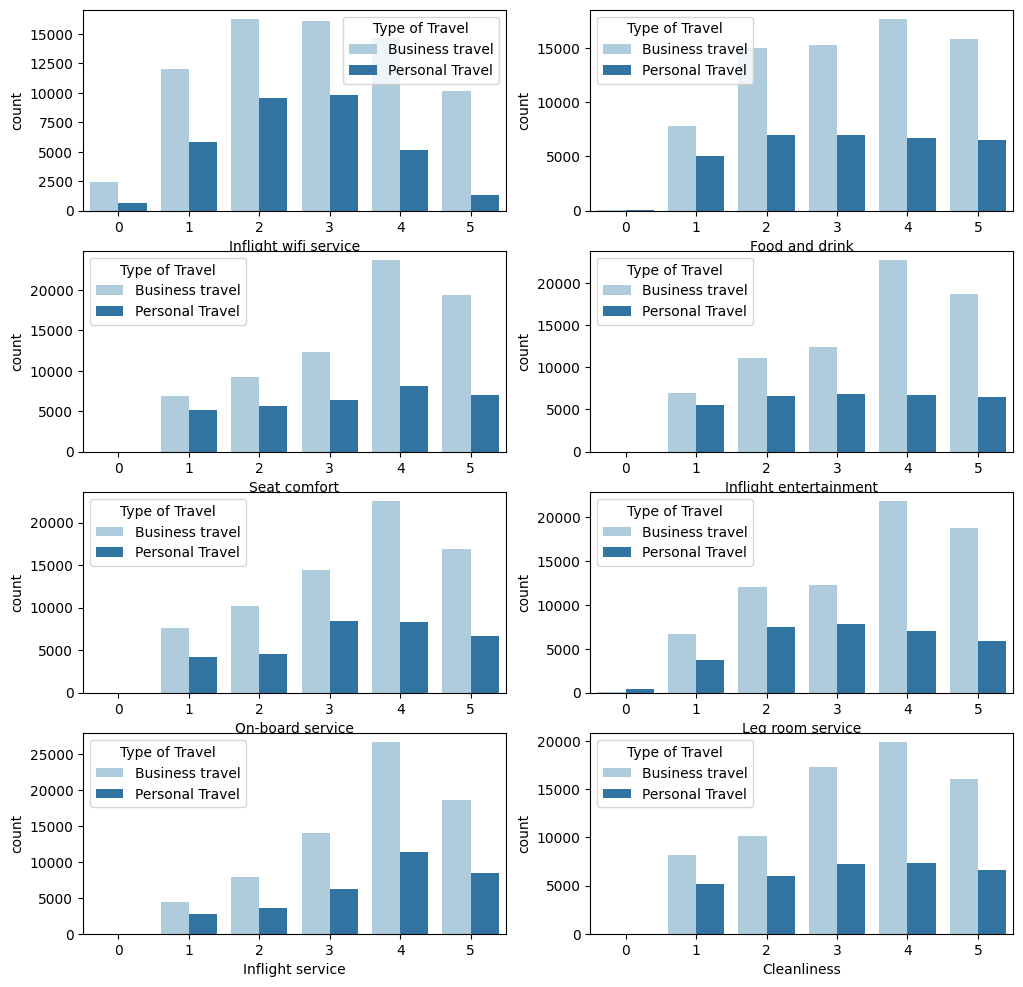

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(12, 12))

sns.countplot(x='Inflight wifi service', hue='Type of Travel', palette='Paired', data=flight_factors, ax=ax[0, 0])
sns.countplot(x='Food and drink', hue='Type of Travel', palette='Paired', data=flight_factors, ax=ax[0, 1])
sns.countplot(x='Seat comfort', hue='Type of Travel', palette='Paired', data=flight_factors, ax=ax[1,0])
sns.countplot(x='Inflight entertainment', hue='Type of Travel', palette='Paired', data=flight_factors, ax=ax[1,1])
sns.countplot(x='On-board service', hue='Type of Travel', palette='Paired', data=flight_factors, ax=ax[2, 0])
sns.countplot(x='Leg room service', hue='Type of Travel', palette='Paired', data=flight_factors, ax=ax[2, 1])
sns.countplot(x='Inflight service', hue='Type of Travel', palette='Paired', data=flight_factors, ax=ax[3, 0])
sns.countplot(x='Cleanliness', hue='Type of Travel', palette='Paired', data=flight_factors, ax=ax[3, 1])

plt.show()


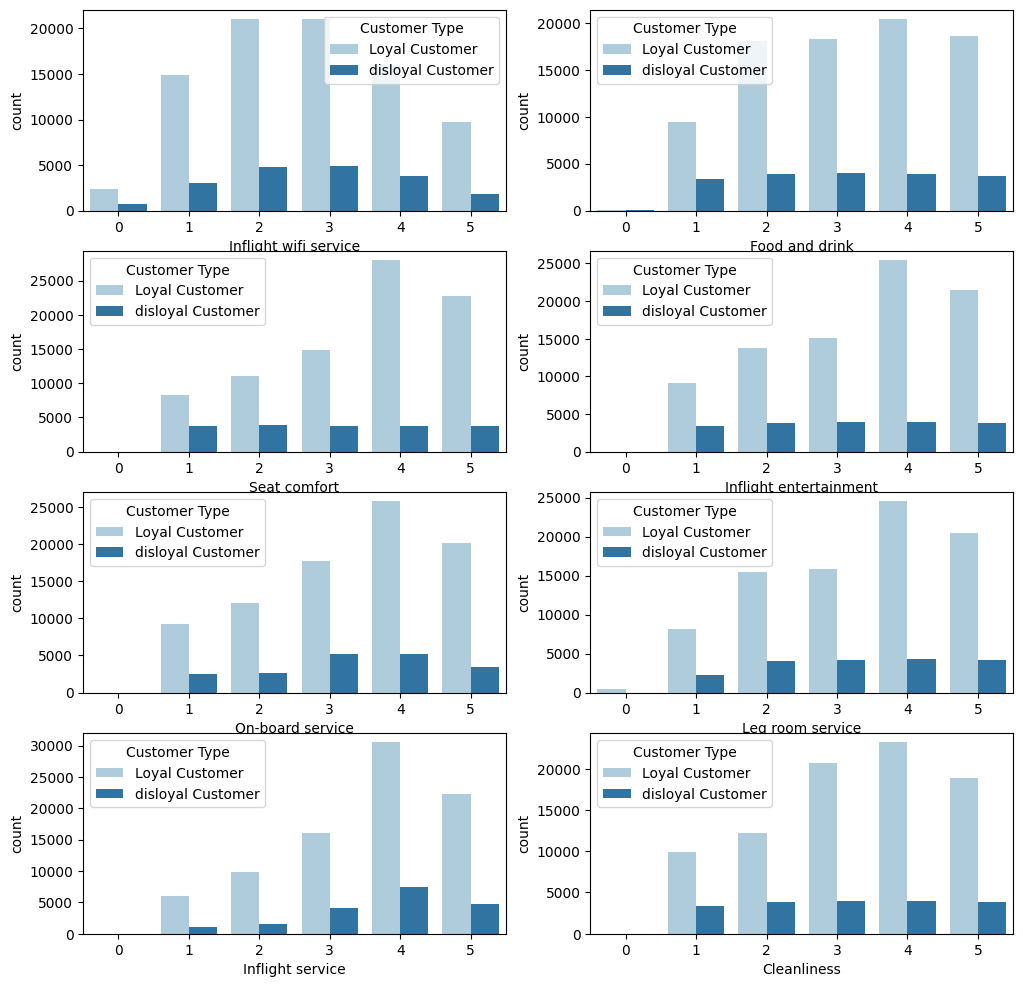

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(12, 12))

sns.countplot(x='Inflight wifi service', hue='Customer Type', palette='Paired', data=flight_factors, ax=ax[0, 0])
sns.countplot(x='Food and drink', hue='Customer Type', palette='Paired', data=flight_factors, ax=ax[0, 1])
sns.countplot(x='Seat comfort', hue='Customer Type', palette='Paired', data=flight_factors, ax=ax[1,0])
sns.countplot(x='Inflight entertainment', hue='Customer Type', palette='Paired', data=flight_factors, ax=ax[1,1])
sns.countplot(x='On-board service', hue='Customer Type', palette='Paired', data=flight_factors, ax=ax[2, 0])
sns.countplot(x='Leg room service', hue='Customer Type', palette='Paired', data=flight_factors, ax=ax[2, 1])
sns.countplot(x='Inflight service', hue='Customer Type', palette='Paired', data=flight_factors, ax=ax[3, 0])
sns.countplot(x='Cleanliness', hue='Customer Type', palette='Paired', data=flight_factors, ax=ax[3, 1])

plt.show()


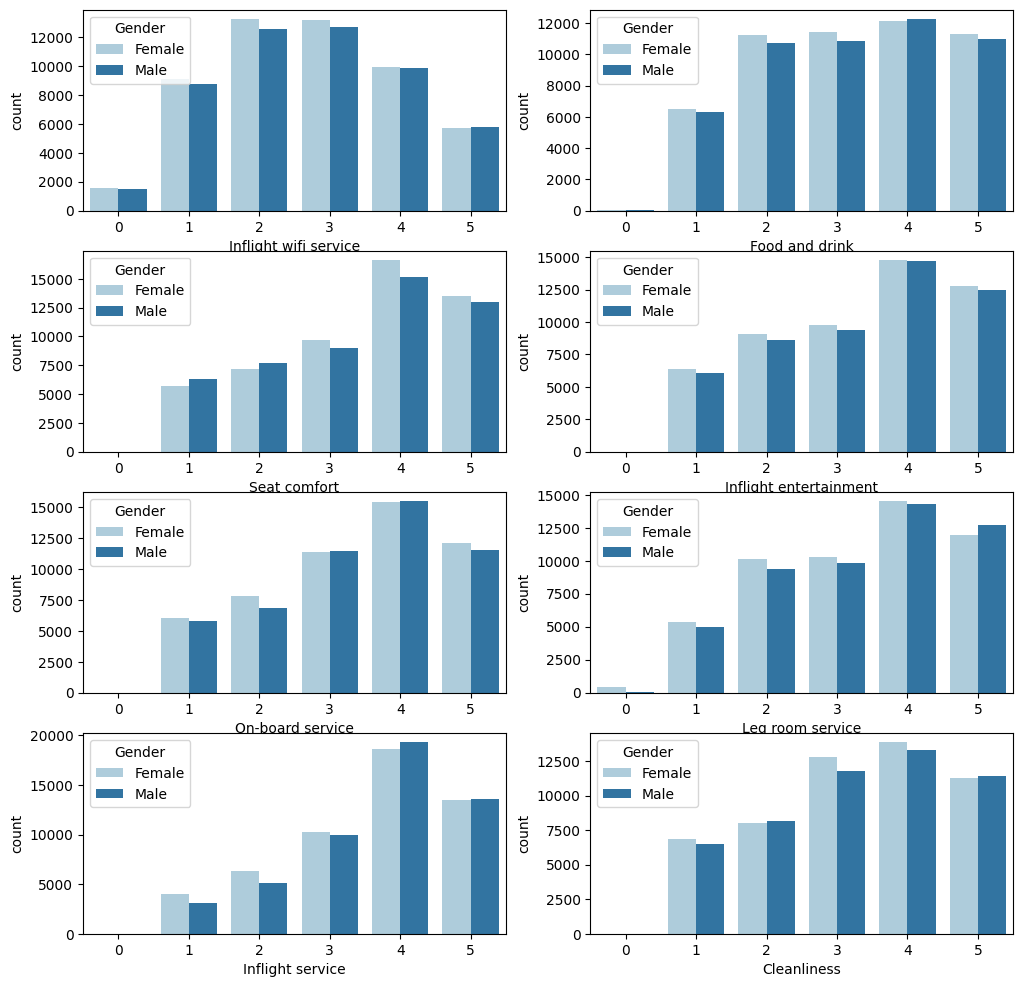

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(12, 12))

sns.countplot(x='Inflight wifi service', hue='Gender', palette='Paired', data=flight_factors, ax=ax[0, 0])
sns.countplot(x='Food and drink', hue='Gender', palette='Paired', data=flight_factors, ax=ax[0, 1])
sns.countplot(x='Seat comfort', hue='Gender', palette='Paired', data=flight_factors, ax=ax[1,0])
sns.countplot(x='Inflight entertainment', hue='Gender', palette='Paired', data=flight_factors, ax=ax[1,1])
sns.countplot(x='On-board service', hue='Gender', palette='Paired', data=flight_factors, ax=ax[2, 0])
sns.countplot(x='Leg room service', hue='Gender', palette='Paired', data=flight_factors, ax=ax[2, 1])
sns.countplot(x='Inflight service', hue='Gender', palette='Paired', data=flight_factors, ax=ax[3, 0])
sns.countplot(x='Cleanliness', hue='Gender', palette='Paired', data=flight_factors, ax=ax[3, 1])

plt.show()


## Post Flight Factors

the following section is an analysis of the postflight factors of a passnegers experience when flying, each categorical variable will be displayed against the variables they encounter after the flight experience

In [ ]:
post_flight_factors = df[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Departure/Arrival time convenient', 'Baggage handling', 'Arrival Delay in Minutes','satisfaction']]

In [74]:
columns_to_average_post_flight = ['Departure/Arrival time convenient', 'Baggage handling']

for column in columns_to_average_post_flight:
    post_flight_factors[column] = post_flight_factors[column].astype(int)

average_ratings_post_flight = post_flight_factors[columns_to_average_post_flight].mean()
print("Average Ratings for Post-flight Factors:")
print(average_ratings_post_flight)
#calculating average ratings for post flight factors

Average Ratings for Post-flight Factors:
Departure/Arrival time convenient    3.060296
Baggage handling                     3.631833
dtype: float64


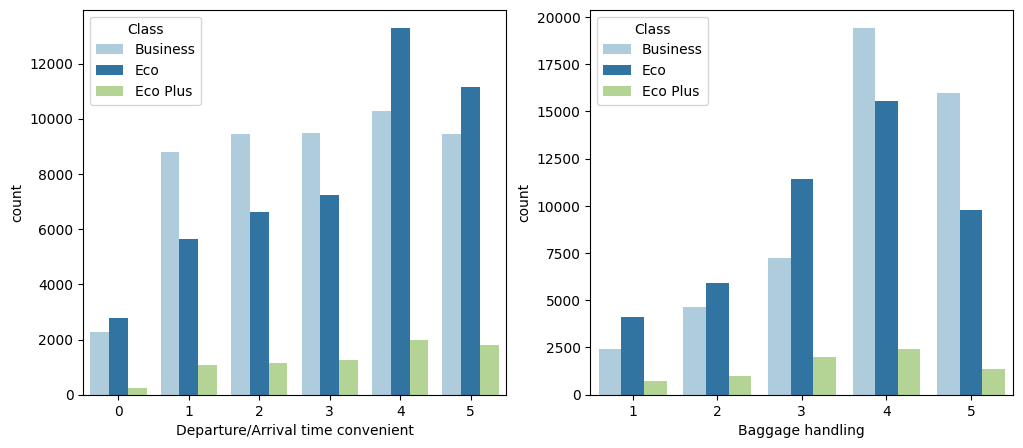

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='Departure/Arrival time convenient', hue='Class', palette='Paired', data=post_flight_factors, ax=ax[0])
sns.countplot(x='Baggage handling', hue='Class', palette='Paired', data=post_flight_factors, ax=ax[1])


plt.show()


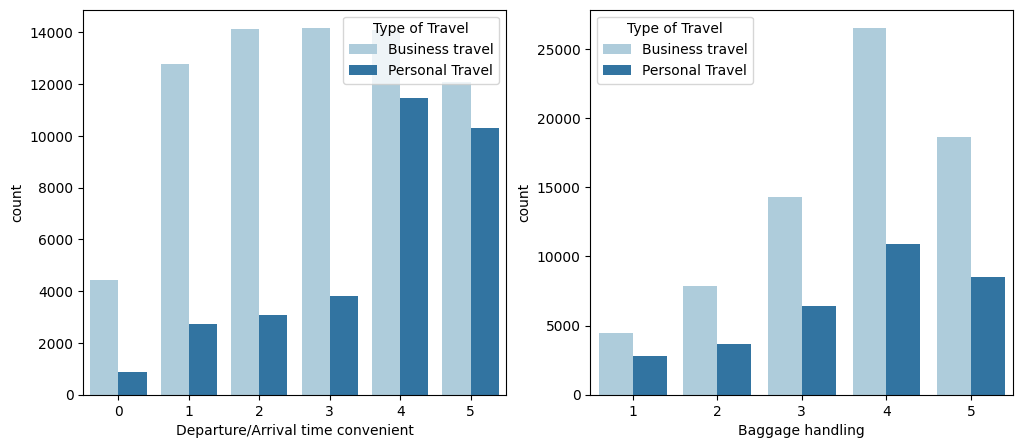

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='Departure/Arrival time convenient', hue='Type of Travel', palette='Paired', data=post_flight_factors, ax=ax[0])
sns.countplot(x='Baggage handling', hue='Type of Travel', palette='Paired', data=post_flight_factors, ax=ax[1])


plt.show()


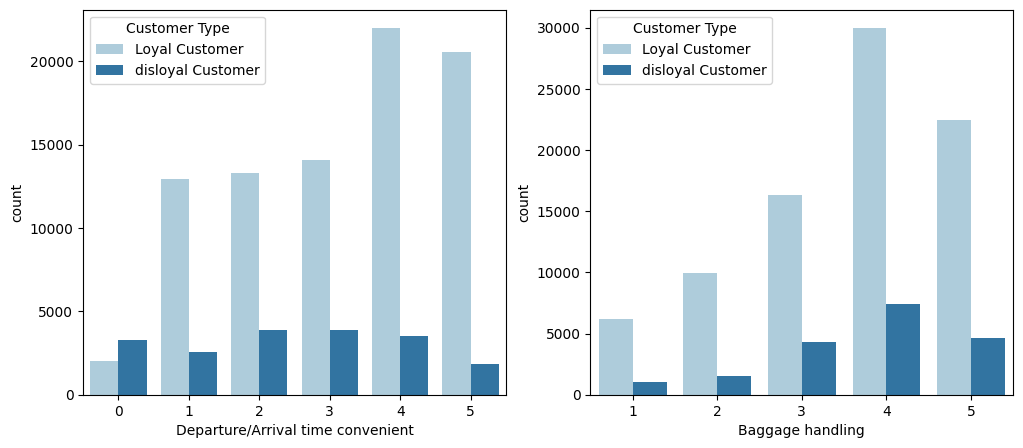

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='Departure/Arrival time convenient', hue='Customer Type', palette='Paired', data=post_flight_factors, ax=ax[0])
sns.countplot(x='Baggage handling', hue='Customer Type', palette='Paired', data=post_flight_factors, ax=ax[1])


plt.show()


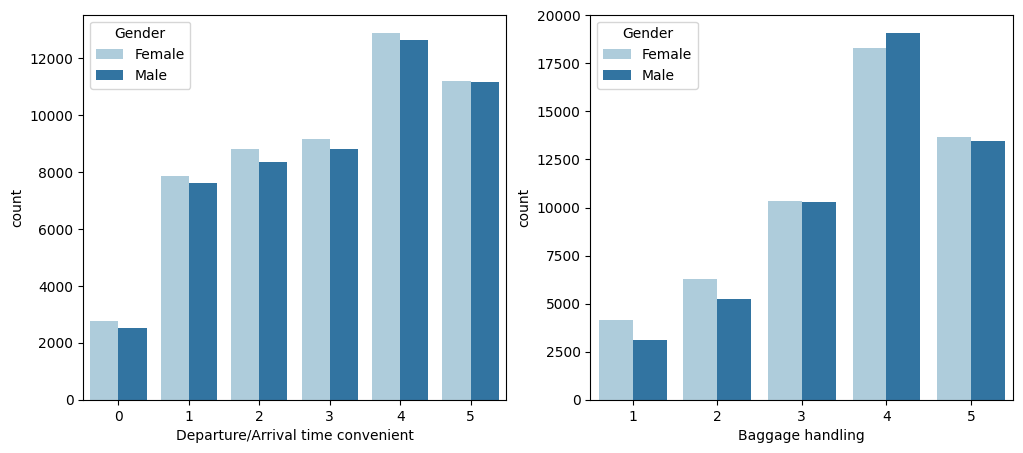

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='Departure/Arrival time convenient', hue='Gender', palette='Paired', data=post_flight_factors, ax=ax[0])
sns.countplot(x='Baggage handling', hue='Gender', palette='Paired', data=post_flight_factors, ax=ax[1])


plt.show()


# Conclusions

The number of men and women in this sample is approximately the same.
The vast majority of the airline's customers are repeat customers.
Most of our clients flew for business rather than personal reasons.
About half of the passengers were in business class.
More than 60% of passengers were satisfied with the luggage transportation service (rating 4-5 out of 5).
More than 50% of passengers were comfortable sitting in their seats (rated 4-5 out of 5).
There was a strong correlation (96%) between the features 'Departure delay in minutes' and 'Arrival delay in minutes' (which is quite logical and was discussed in detail above).
Most of the airline's regular customers are between the ages of 30 and 50 (averaging a little over 40). The age range for non-regular customers is slightly smaller (from 25 to 40 years old, with an average of slightly less than 30).
Customers whose flight distance is long tend to fly in business class.
The more distance an airplane passenger travels (respectively, the longer they are in flight), the more satisfied they are with in-flight entertainment and extra legroom (on average).
Most of the passengers who flew in Economy Plus or Economy Class were dissatisfied with the flight, and those who flew in Business Class were satisfied.

## Pre Flight Conclusions

On average the factors which customes are least satisfied with are ease of online booking average score of 2.75/5, and gate location 2.98/5, whilst check in service 3.3/5, and online boarding 3.1/5 are the factors customers are most satisfied with.


## in Flight Conclusions
on average passengers are more satisfied with factors in flight compared to pre flight with more scores being above 3/5. inflight wifi service was the least satisfactory with a score od 2.73/5 followed by food and drink at 3.2/5. inflight service and care was the most satisfactory with a score of 3.64/5 and on board services with a score of 3.38/5


## Post Flight Conclusions
with one of the highest satisfaction rates, passsengers are most satisfied with baggage handling with a score of 3.6/5 whilst arrival times score 3.06/5 in the satisfactory scale.
